In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# definir caminho do arquivo
data_path = 'Walmart_Sales.csv'

In [3]:
import os
print(os.getcwd())  # Mostra o diretório atual

c:\Users\Guilherme e Beatriz\projeto-aplicado-1\Projeto-Aplicado-1


In [4]:
import pandas as pd

# Ler o arquivo
df = pd.read_csv(data_path)

# Exibir algumas linhas para confirmar
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [7]:
import pandas as pd

# Verificar e converter a coluna 'Date' para o formato de data, se necessário
if not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [9]:
# Obter o resumo estatístico do DataFrame
print(df.describe())

             Store                 Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                 6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00  1.046965e+06      0.069930   
min       1.000000  2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000  2010-10-08 00:00:00  5.533501e+05      0.000000   
50%      23.000000  2011-06-17 00:00:00  9.607460e+05      0.000000   
75%      34.000000  2012-02-24 00:00:00  1.420159e+06      0.000000   
max      45.000000  2012-10-26 00:00:00  3.818686e+06      1.000000   
std      12.988182                  NaN  5.643666e+05      0.255049   

       Temperature   Fuel_Price          CPI  Unemployment  
count  6435.000000  6435.000000  6435.000000   6435.000000  
mean     60.663782     3.358607   171.578394      7.999151  
min      -2.060000     2.472000   126.064000      3.879000  
25%      47.460000     2.933000   131.735000      6.891000  
50%      62.670000     3.445000   182.616521      7.874

In [10]:
print(df.describe(include='all'))

             Store                 Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                 6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00  1.046965e+06      0.069930   
min       1.000000  2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000  2010-10-08 00:00:00  5.533501e+05      0.000000   
50%      23.000000  2011-06-17 00:00:00  9.607460e+05      0.000000   
75%      34.000000  2012-02-24 00:00:00  1.420159e+06      0.000000   
max      45.000000  2012-10-26 00:00:00  3.818686e+06      1.000000   
std      12.988182                  NaN  5.643666e+05      0.255049   

       Temperature   Fuel_Price          CPI  Unemployment  
count  6435.000000  6435.000000  6435.000000   6435.000000  
mean     60.663782     3.358607   171.578394      7.999151  
min      -2.060000     2.472000   126.064000      3.879000  
25%      47.460000     2.933000   131.735000      6.891000  
50%      62.670000     3.445000   182.616521      7.874

In [ ]:
Primeira Analise = Nas lojas onde a temperatura cai significativamente abaixo do ponto de congelamento (32°F), observa-se um impacto substancial nas vendas semanais. Esse efeito é mais evidente na análise do primeiro quartil do boxplot (rabicho inferior), onde as vendas são significativamente reduzidas.
A relação pode ser explicada por uma combinação de fatores, incluindo menor tráfego de clientes devido às condições climáticas severas e possíveis desafios logísticos. O comportamento pode ser evidenciado pelo desvio estatístico das vendas em faixas de temperatura mais baixas quando comparado a quartis superiores. A concentração de dados nesse rabicho inferior reforça a hipótese de que a temperatura extrema afeta diretamente as operações comerciais e a demanda em locais específicos.
Além disso, é relevante considerar correlações com outras variáveis, como os dias de feriado ou as taxas de desemprego local, para entender completamente a amplitude do impacto.

C:\Users\Guilherme e Beatriz\AppData\Local\Temp\ipykernel_15164\2323691180.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sums_temp = dfplot.groupby('Temp_Quantile')['Weekly_Sales'].sum()


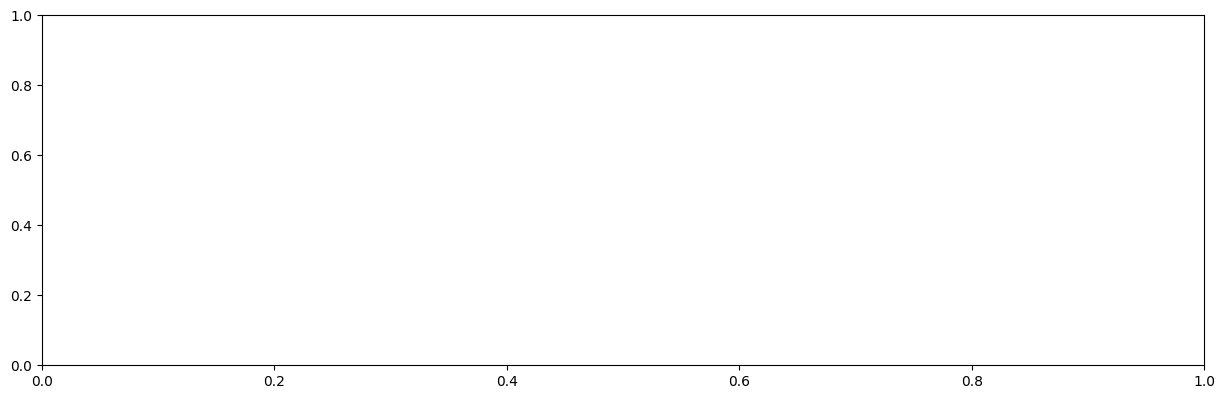

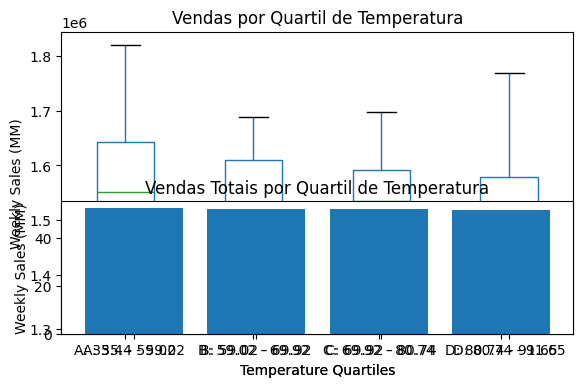

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ler os dados
data_path = 'Walmart_Sales.csv'
df = pd.read_csv(data_path)

# Certificar-se de que a coluna 'Date' está em formato de data
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filtrar os outliers da loja (exemplo: loja 1)
nstore = 1
Q1 = df[df['Store'] == nstore]['Weekly_Sales'].quantile(0.25)
Q3 = df[df['Store'] == nstore]['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dfplot = df[(df['Store'] == nstore) & 
            (df['Weekly_Sales'] > lower_bound) & 
            (df['Weekly_Sales'] < upper_bound)].copy()

# Quartis da Temperatura
Q0_TEMP = dfplot['Temperature'].min()
Q1_TEMP = dfplot['Temperature'].quantile(0.25)
Q2_TEMP = dfplot['Temperature'].quantile(0.50)
Q3_TEMP = dfplot['Temperature'].quantile(0.75)
Q4_TEMP = dfplot['Temperature'].max()

# Labels para os quartis
labels = [f"A: {round(Q0_TEMP, 2)} - {round(Q1_TEMP, 2)}",
          f"B: {round(Q1_TEMP, 2)} - {round(Q2_TEMP, 2)}",
          f"C: {round(Q2_TEMP, 2)} - {round(Q3_TEMP, 2)}",
          f"D: {round(Q3_TEMP, 2)} - {round(Q4_TEMP, 2)}"]

# Usando .loc para modificar a cópia explicitamente
dfplot.loc[:, 'Temp_Quantile'] = pd.cut(dfplot['Temperature'],
                                        bins=[Q0_TEMP, Q1_TEMP, Q2_TEMP, Q3_TEMP, Q4_TEMP],
                                        labels=labels,
                                        include_lowest=True)

# Criar os gráficos
plt.figure(figsize=(15, 10))

# Gráfico 1: Boxplot das Vendas Semanais por Quartil de Temperatura
plt.subplot(2, 1, 1)  # 2 linhas, 1 coluna, gráfico 1
dfplot.boxplot(column='Weekly_Sales', by='Temp_Quantile', grid=False)
plt.title('Vendas por Quartil de Temperatura')
plt.suptitle('')  # Remover título extra
plt.ylabel('Weekly Sales (MM)')
plt.xlabel('Temperature Quartiles')

# Gráfico 2: Gráfico de Barras das Vendas Totais por Quartil de Temperatura
sums_temp = dfplot.groupby('Temp_Quantile')['Weekly_Sales'].sum()
plt.subplot(2, 1, 2)  # 2 linhas, 1 coluna, gráfico 2
plt.bar(sums_temp.index.astype(str), sums_temp / 1e6)  # Conversão de índice para string
plt.title('Vendas Totais por Quartil de Temperatura')
plt.ylabel('Weekly Sales (MM)')
plt.xlabel('Temperature Quartiles')

# Ajustar layout para evitar sobreposição
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar margens
plt.show()
